# Augmentation

In [0]:
import random
import numpy as np
from imgaug import augmenters as ia
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display

In [0]:
class DataAugmentation:
    def __init__(self):
        print('DataAugmentation')
    
        
    def augment(self, images):
        rand_val=random.randint(0,360)
        print('Rotated randomly at',rand_val)
        images_aug_afffine =ia.Affine(rotate=rand_val,cval=(128, 128)).augment_image(images) # randomly rotates between 0 to 360 ??180??
        ##!!!!!!!!!!!!!!!!!! during flip the black parts need to be set 128 !!!!!!!!!!!!!!!!!!!!!!
#         plt.title('Rotation')
#         fig.add_subplot(50,50,2)
#         plt.imshow(images_aug_afffine)
        images_aug_flip =ia.Fliplr(1.0).augment_image(images) # horizontally flip all of the images
#         plt.title('Flip')
#         fig.add_subplot(50,50,3)
#         plt.imshow(images_aug_flip)
        images_aug_scale = ia.Scale(1.0).augment_image(images) # scales all images to 90 percent of their original size.
#         plt.title('Scale')
#         fig.add_subplot(50,50,4)
#         plt.imshow(images_aug_scale)
        return (images,images_aug_afffine,images_aug_scale,images_aug_flip)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# augmented_list = []

In [0]:
# obj_augmentation = DataAugmentation()

# for f in (glob.glob("/content/gdrive/My Drive/MLMI_100imgs/*.npy")):
#   image = np.load(f)
#   fig=plt.figure(figsize=(200, 200))
#   fig.add_subplot(50,50,1)
#   plt.imshow(image)
#   plt.title('Original')
#   obj_augmentation.augment(image)
#   plt.show()
#   augmented_list.append(image)

In [0]:
# ! pip install imgaug

#Training

In [0]:
import tensorflow.contrib.slim as slim
import tensorflow as tf
import sys
import os
import glob

In [0]:
sys.path.append("/models/research/slim")

In [14]:
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/models/research/slim']


### To install slim

```
!CHECKPOINT_DIR=/tmp/checkpoints
!mkdir ${CHECKPOINT_DIR}
!wget http://download.tensorflow.org/models/inception_resnet_v2_2016_08_30.tar.gz
!tar -xvf inception_resnet_v2_2016_08_30.tar.gz
!mv inception_resnet_v2_2016_08_30.ckpt ${CHECKPOINT_DIR}
!rm inception_resnet_v2_2016_08_30.tar.gz
```

In [0]:
# !CHECKPOINT_DIR=/tmp/checkpoints
# !mkdir ${CHECKPOINT_DIR}
# !wget http://download.tensorflow.org/models/inception_resnet_v2_2016_08_30.tar.gz
# !tar -xvf inception_resnet_v2_2016_08_30.tar.gz
# !mv inception_resnet_v2_2016_08_30.ckpt ${CHECKPOINT_DIR}
# !rm inception_resnet_v2_2016_08_30.tar.gz

In [0]:
# !git clone https://github.com/tensorflow/models/

In [0]:
from models.research.slim.nets.inception_resnet_v2 import inception_resnet_v2, inception_resnet_v2_base, inception_resnet_v2_arg_scope

In [0]:
# img = np.load("/content/gdrive/My Drive/MLMI_100imgs/10_left_preprocessed.npy")
# img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
# img_tensor = tf.reshape(img_tensor, [1, 512, 512, 3])

In [0]:
# img_tensor

In [0]:
# with slim.arg_scope(inception_resnet_v2_arg_scope()):
#      logits, end_points = inception_resnet_v2_base(img_tensor)

In [0]:
# logits

In [0]:
# # Reading the dataset
# # 2 modes: 'file' or 'folder'
# def read_images(dataset_path, mode, batch_size):
#   augmented_list = []
#   labels = []
    
#   for f in (glob.glob("/content/gdrive/My Drive/MLMI_100imgs/*.npy")): 
    
#     image = np.load(f)
#     fig=plt.figure(figsize=(200, 200))
#     fig.add_subplot(50,50,1)
#     plt.imshow(image)
#     plt.title('Original')
#     obj_augmentation.augment(image)
#     plt.show()
    
#     img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
#     img_tensor = tf.reshape(img_tensor, [1, 512, 512, 3])
    
#     augmented_list.append(image)

#     return X, Y

In [23]:
augmented_list = []
# labels = []
obj_augmentation = DataAugmentation()

for f in (glob.glob("/content/gdrive/My Drive/MLMI_100imgs/*.npy")): 
  image = np.load(f)
#     fig=plt.figure(figsize=(200, 200))
#     fig.add_subplot(50,50,1)
#     plt.imshow(image)
#     plt.title('Original')
  augmented_tuple = obj_augmentation.augment(image)
#   temp_list = []
  for i in range (0, 4):
#     temp_list.append(augmented_tuple[i])
#     print(augmented_tuple[i].shape)
    augmented_list.append(augmented_tuple[i])
#     plt.show()

augemnted_array = np.array(augmented_list)

DataAugmentation
Rotated randomly at 333
Rotated randomly at 176
Rotated randomly at 235
Rotated randomly at 154
Rotated randomly at 135
Rotated randomly at 337
Rotated randomly at 348
Rotated randomly at 154
Rotated randomly at 293
Rotated randomly at 93
Rotated randomly at 195
Rotated randomly at 240
Rotated randomly at 236
Rotated randomly at 67
Rotated randomly at 203
Rotated randomly at 8
Rotated randomly at 317
Rotated randomly at 22
Rotated randomly at 204
Rotated randomly at 223
Rotated randomly at 36
Rotated randomly at 259
Rotated randomly at 107
Rotated randomly at 261
Rotated randomly at 172
Rotated randomly at 142
Rotated randomly at 278
Rotated randomly at 90
Rotated randomly at 143
Rotated randomly at 14
Rotated randomly at 48
Rotated randomly at 346
Rotated randomly at 242
Rotated randomly at 229
Rotated randomly at 130
Rotated randomly at 190
Rotated randomly at 172
Rotated randomly at 289
Rotated randomly at 284
Rotated randomly at 330
Rotated randomly at 39
Rotated r

In [0]:
# array_check = np.array(augmented_list)

In [0]:
# array_check.shape

In [26]:
len(augmented_list)

400

In [0]:
# long_labels = np.genfromtxt("/content/gdrive/My Drive/MLMI_100imgs/trainLabels.csv", delimiter=',')

In [0]:
# long_labels

In [0]:
df_long_labels = pd.read_csv("/content/gdrive/My Drive/MLMI_100imgs/trainLabels.csv")

In [0]:
labels = df_long_labels["level"].values

In [0]:
labels = labels[0:100]

In [0]:
labels = np.repeat(labels, repeats = 4, axis = 0)

In [33]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
# data = array(labels)
print(labels)
# one hot encode
encoded = to_categorical(labels)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 4 4 4 4 4 4 4 4 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
0


Using TensorFlow backend.


In [34]:
encoded[17]

array([0., 1., 0., 0., 0.], dtype=float32)

In [0]:
# new_labels = []
# for i in range(0, 100):
#   new_labels.append([])

In [0]:
# Config
config = {}
config['batchsize'] = 4 # can change it, but might become noisy
config['learningrate'] = 0.01 # can change to 0.001
config['numEpochs'] = 10 # can change to 20

In [0]:
# Define placeholders
inputs = {}
inputs['data'] = tf.placeholder(tf.float32, [None, 512, 512, 3])
inputs['labels'] = tf.placeholder(tf.float32, [None, 5])
inputs['phase'] = tf.placeholder(tf.bool)

# Define a dictionary for storing curves
curves = {}
curves['training_loss'] = []
curves['validation_loss'] = []
curves['training_auc'] = []
curves['validation_auc'] = []

# Instantiate the model operations
with slim.arg_scope(inception_resnet_v2_arg_scope()):
    logits, end_points = inception_resnet_v2(inputs['data'], num_classes = 5, is_training = True)

# Define loss function in a numerically stable way
# DONT: cross_entropy = tf.reduce_mean(-tf.reduce_sum( * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = inputs['labels']))

# Operations for assessing the accuracy of the classifier
correct_prediction = tf.equal(tf.argmax(end_points["Predictions"],1), tf.argmax(inputs['labels'],1))
accuracy_operation = tf.cast(correct_prediction, tf.float32)

# Idea: Use different optimizers?
# SGD vs ADAM
# train_step = tf.train.AdamOptimizer(config['learningrate']).minimize(cross_entropy)
train_step = tf.train.GradientDescentOptimizer(config['learningrate']).minimize(cross_entropy)

In [38]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionResnetV2/AuxLogits/Logits/BiasAdd:0' shape=(?, 5) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_1a_3x3/Relu:0' shape=(?, 255, 255, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_2a_3x3/Relu:0' shape=(?, 253, 253, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_2b_3x3/Relu:0' shape=(?, 253, 253, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_3b_1x1/Relu:0' shape=(?, 126, 126, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_4a_3x3/Relu:0' shape=(?, 124, 124, 192) dtype=float32>,
 'Conv2d_7b_1x1': <tf.Tensor 'InceptionResnetV2/InceptionResnetV2/Conv2d_7b_1x1/Relu:0' shape=(?, 14, 14, 1536) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionResnetV2/Logits/Logits/BiasAdd:0' shape=(?, 5) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'Ince

In [0]:
fetches = {
    'optimizer': train_step,
    'loss': cross_entropy,
    'auc': accuracy_operation
}

In [0]:
# Create TensorFlow Session and initialize all weights
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [0]:
def visualizeCurves(curves, handle=None):
    if not handle:
        handle = plt.figure()

    fig = plt.figure(handle.number)
    fig.clear()
    ax = plt.axes()
    plt.cla()

    counter = len(curves[list(curves.keys())[0]])
    x = np.linspace(0, counter, num=counter)
    for key, value in curves.items():
        value_ = np.array(value).astype(np.double)
        mask = np.isfinite(value_)
        ax.plot(x[mask], value_[mask], label=key)
    plt.legend(loc='upper right')
    plt.title("Curves")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    display.clear_output(wait=True)
    plt.show()

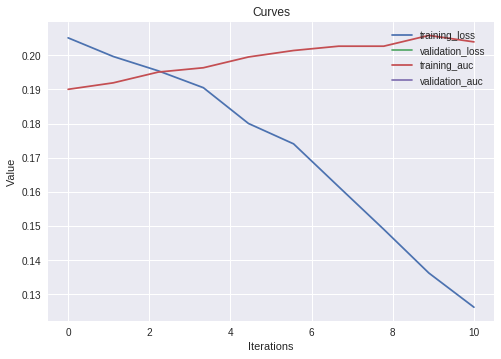

In [42]:
# Run!
numTrainSamples = len(augmented_list)
# numValSamples = len(mnist.validation.images)
# numTestSamples = len(mnist.test.images)
for e in range(config['numEpochs']):
    avg_loss_in_current_epoch = 0
    avg_auc_in_current_epoch = 0
    for i in range(0, numTrainSamples, config['batchsize']):
#         # Idea: Train once with the original data distribution, once with class imbalance
#         batch_data, batch_labels = mnist.train.next_batch(config['batchsize'])
#         # as it was originaly flattened
#         batch_data = batch_data.reshape((batch_data.shape[0], 28, 28, 1))
        
#         # TODO: Preprocess the images in the batch
#         batch_data = np.pad(batch_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
#         fetches = {
#             'optimizer': train_step,
#             'loss': cross_entropy,
#             'auc': accuracy_operation
#         }
        results = sess.run(fetches, feed_dict={inputs['data']: augemnted_array[i:i+4], inputs['labels']: encoded[i:i+4]})
        avg_loss_in_current_epoch += results['loss']
        avg_auc_in_current_epoch += np.mean(results['auc'])
    # computing the average by deviding by the batch size
    avg_loss_in_current_epoch = avg_loss_in_current_epoch / i
    avg_auc_in_current_epoch = avg_auc_in_current_epoch /i 
    curves['training_loss'] += [avg_loss_in_current_epoch]
    curves['training_auc'] += [avg_auc_in_current_epoch]
    
#     for i in range(0, numValSamples, config['batchsize']):
#         # Use Matplotlib to visualize the loss on the training and validation set
#         batch_data, batch_labels = mnist.validation.next_batch(config['batchsize'])
#         batch_data = batch_data.reshape((batch_data.shape[0], 28, 28, 1))
        
#         # TODO: Preprocess the images in the batch
#         batch_data = np.pad(batch_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
        
#         fetches = {
#             'loss': cross_entropy,
#             'auc': accuracy_operation
#         }
#         results = sess.run(fetches, feed_dict={inputs['data']: batch_data, inputs['labels']: batch_labels})
#         avg_loss_in_current_epoch += results['loss']
#         avg_auc_in_current_epoch += np.mean(results['auc'])
#     avg_loss_in_current_epoch = avg_loss_in_current_epoch / i
#     avg_auc_in_current_epoch = avg_auc_in_current_epoch /i 
#     curves['validation_loss'] += [avg_loss_in_current_epoch]
#     curves['validation_auc'] += [avg_auc_in_current_epoch]
    
    print('Done with epoch %d' % (e))
    visualizeCurves(curves)

In [0]:
# !pip install imgaug

In [44]:
augmented_list[0:0+4]

[array([[[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
         [128, 128, 128],
         [128, 128, 128]],
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
         [128, 128, 128],
         [128, 128, 128]],
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
         [128, 128, 128],
         [128, 128, 128]],
 
        ...,
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
         [128, 128, 128],
         [128, 128, 128]],
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
         [128, 128, 128],
         [128, 128, 128]],
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [128, 128, 128],
  

In [45]:
encoded[0:0+4].shape

(4, 5)